# Project 2 - UVOT Data Reduction
---
## Sparsha Ray (MS21256)
#### PHY669 (Astrophysics Techniques 2025 Spring)

<br></br>

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the data, input the other parameters

In [2]:
# Change the path !
path = '/run/media/sparsharay/groot/Codes/Workspace/Courses/PHY669_APM/prj2/data/'

m2_brightest = np.loadtxt(path + 'B_M2_RadProf.dat')
v_brightest = np.loadtxt(path + 'B_V_RadProf.dat')
m2_faintest = np.loadtxt(path + 'F_M2_RadProf.dat')
v_faintest = np.loadtxt(path + 'F_V_RadProf.dat')

# Observation time in seconds [of obs.00035030001 (brightest) and obs.00031493022 (faintest)]
t_brightest = 11230.12200
t_faintest  = 6904.12800

# Central wavelengths of bb, m2, uu, vv, w1, w2 bands in Angstroms
wavelengths = np.array([4392, 2246, 3465, 5468, 2600, 1928])

energies = 6.626E-34 * 299792458 / (wavelengths * 1E-10) # in Joules

#### Plot the reddening corrected radial profiles

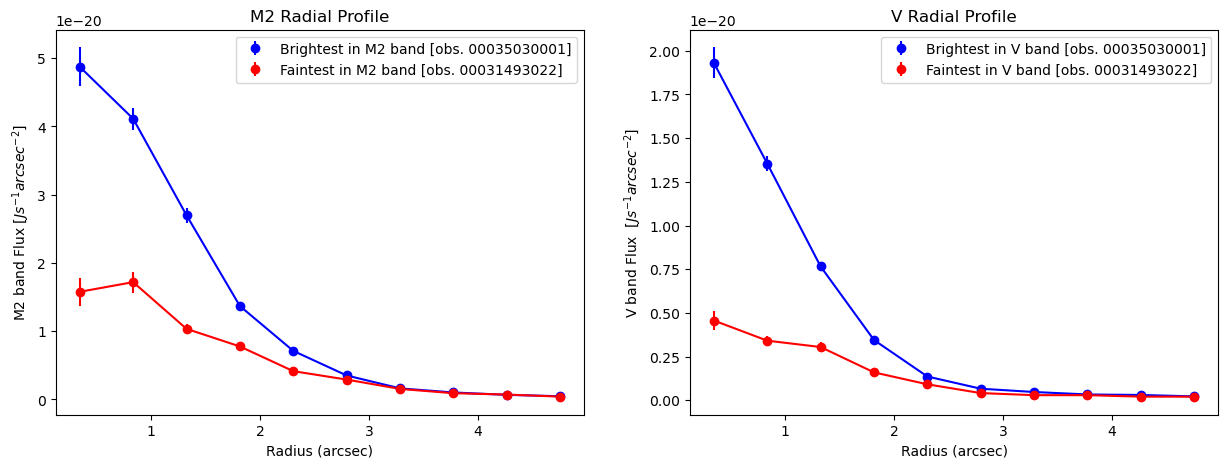

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# The following code multiplies the flux (photon count) by the reddening correction factor and then converts it to energy flux (Joules per second per square arcsecond)
# It got messy because of the incremental corrections done while writing the code, and the lack of time to refactor the entire structure !

# M2 Radial Profile
ax[0].errorbar(m2_brightest[:, 0], 2.162230787246821 * m2_brightest[:, 1] * energies[1] / t_brightest,\
               yerr= 2.162230787246821 * m2_brightest[:, 2] * energies[1] / t_brightest,\
               label='Brightest in M2 band [obs. 00035030001]', color='blue', fmt='o')
ax[0].errorbar(m2_faintest[:, 0],  2.162230787246821 * m2_faintest[:, 1]  * energies[1] / t_faintest,\
               yerr= 2.162230787246821 * m2_faintest[:, 2]  * energies[1] / t_faintest,\
               label='Faintest in M2 band [obs. 00031493022]',  color='red',  fmt='o')

ax[0].plot(m2_brightest[:, 0], 2.162230787246821 * m2_brightest[:, 1] * energies[1] / t_brightest, 'b-')
ax[0].plot(m2_faintest[:, 0] , 2.162230787246821 * m2_faintest[:, 1]  * energies[1] / t_faintest,  'r-')
ax[0].set_title('M2 Radial Profile')
ax[0].set_xlabel('Radius (arcsec)')
ax[0].set_ylabel('M2 band Flux [$J s^{-1} arcsec^{-2}$]')
ax[0].legend() 


# V Radial Profile
ax[1].errorbar(v_brightest[:, 0], 1.2908096467883046 * v_brightest[:, 1] * energies[3] / t_brightest,\
               yerr=1.2908096467883046 * v_brightest[:, 2] * energies[3] / t_brightest,\
               label='Brightest in V band [obs. 00035030001]', color='blue', fmt='o')
ax[1].errorbar(v_faintest[:, 0],  1.2908096467883046 * v_faintest[:, 1]  * energies[3] / t_faintest,\
               yerr=1.2908096467883046 * v_faintest[:, 2]  * energies[3] / t_faintest,\
               label='Faintest in V band [obs. 00031493022]',  color='red',  fmt='o')

ax[1].plot(v_brightest[:, 0], 1.2908096467883046 * v_brightest[:, 1] * energies[3] / t_brightest, 'b-')
ax[1].plot(v_faintest[:, 0], 1.2908096467883046 * v_faintest[:, 1] * energies[3] / t_faintest, 'r-')
ax[1].set_title('V Radial Profile')
ax[1].set_xlabel('Radius (arcsec)')
ax[1].set_ylabel('V band Flux  [$J s^{-1} arcsec^{-2}$]')
ax[1].legend()

plt.show()


#### Plotting the SED for various observations

In [4]:
# Tiny useful script to get the Spectral Energy Distribution (SED) data

import subprocess
import os

path = '/run/media/sparsharay/groot/Softwares/Scientific/sample_data/3C454.3'  # change the path again !
filters = ['bb', 'm2', 'uu', 'vv', 'w1', 'w2']

master = []

os.chdir(path)

dirs = subprocess.getoutput(f"ls").split('\n')
print(dirs)

for dir in dirs :
    os.chdir(f'{path}/{dir}/uvot/image')
    for filter in filters :
        sky = f'sw{dir}u{filter}_sk.img.gz'
        p = subprocess.Popen(f"uvotsource image={sky} srcreg=V_source.reg bkgreg=V_background.reg sigma=3 output=FLUX",\
                              stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)
        output, error = p.communicate(input=b'\n')
        data = output.decode().split('\n')
        for line in data :
            if 'Source:' in line : # or just grep !
                vals = line.split()
                val = (float(f'{vals[1]}E{vals[-1][3:]}'))
                master.append([dir, filter, val])

# print(master)

['00031493016', '00031493022', '00031493025', '00031493028', '00035030001']


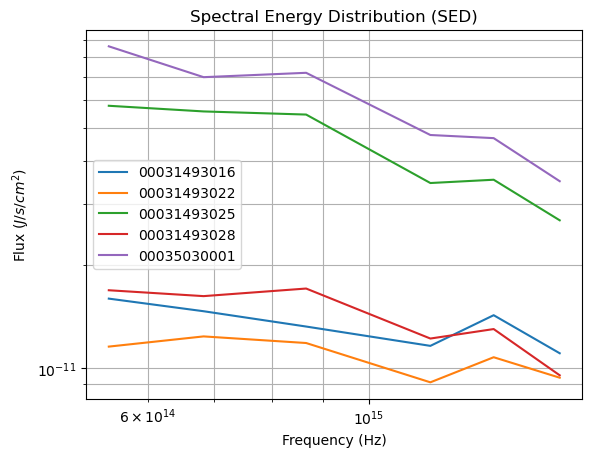

In [5]:
# Importing the Spectral Energy Distribution (SED) data as given by the above script

sed_arr = [[['00031493016', 'bb', 2.26e-15], ['00031493016', 'm2', 2.94e-15], ['00031493016', 'uu', 2.11e-15], ['00031493016', 'vv', 2.26e-15], ['00031493016', 'w1', 2.59e-15], ['00031493016', 'w2', 2.92e-15]], 
           [['00031493022', 'bb', 1.91e-15], ['00031493022', 'm2', 2.22e-15], ['00031493022', 'uu', 1.89e-15], ['00031493022', 'vv', 1.64e-15], ['00031493022', 'w1', 2.03e-15], ['00031493022', 'w2', 2.48e-15]], 
           [['00031493025', 'bb', 8.59e-15], ['00031493025', 'm2', 7.27e-15], ['00031493025', 'uu', 8.70e-15], ['00031493025', 'vv', 8.20e-15], ['00031493025', 'w1', 7.69e-15], ['00031493025', 'w2', 7.10e-15]], 
           [['00031493028', 'bb', 2.50e-15], ['00031493028', 'm2', 2.68e-15], ['00031493028', 'uu', 2.72e-15], ['00031493028', 'vv', 2.39e-15], ['00031493028', 'w1', 2.72e-15], ['00031493028', 'w2', 2.52e-15]],
           [['00035030001', 'bb', 1.08e-14], ['00035030001', 'm2', 9.60e-15], ['00035030001', 'uu', 1.15e-14], ['00035030001', 'vv', 1.22e-14], ['00035030001', 'w1', 1.06e-14], ['00035030001', 'w2', 9.22e-15]]]


for data in sed_arr:

    obs = data[0][0]
    flux = np.array([d[2] for d in data])
    
    sortedidx = np.argsort(wavelengths)
    sorted_wavelengths = wavelengths[sortedidx]
    sorted_flux        = flux[sortedidx]

    wavelengths_micron = sorted_wavelengths * 1E-4 
    sorted_wavenumbers = 1 / wavelengths_micron

    sorted_flux_dereddened = []

    for x, flux in zip(sorted_wavenumbers, sorted_flux) :

        if 0.3 <= x <= 1.1 :
            a = 0.574 * (x**1.61)
            b = 0.527 * (x**1.61)
        elif 1.1 <= x <= 3.3 :
            y = x - 1.82
            a = 1 + 0.17699 * y + 0.50447 * (y ** 2) - 0.02427 * (y ** 3) + 0.72085 * (y ** 4) + 0.01979 * (y ** 5) - 0.77530 * (y ** 6) + 0.32999 * (y ** 7)
            b = 1.41338 * y + 2.28305 * (y ** 2) + 1.07233 * (y ** 3) - 5.38434 * (y ** 4) - 0.62251 * (y ** 5) + 5.30260 * (y ** 6) - 2.90002 * (y ** 7)
        elif 3.3 < x <= 8 :
            F_a = 0
            F_b = 0
            if x > 5.9 :
                F_a = -0.04473 * ((x - 5.9) ** 2) - 0.009779 * ((x - 5.9) ** 3)
                F_b = 0.2130 * ((x - 5.9) ** 2) + 0.1207 * ((x - 5.9) ** 3)
            a = 1.752 - 0.316 * x - 0.104 / ((x - 4.67) ** 2 + 0.341) + F_a
            b = -3.090 + 1.825 * x + 1.206 / ((x - 4.62) ** 2 + 0.263) + F_b
        
        A_l = 0.0889 * (a * 3.1 + b)
        flux_ratio = 10 ** (0.4 * A_l)
        
        flux_dereddened = flux * flux_ratio
        sorted_flux_dereddened.append(flux_dereddened)

    sorted_flux_dereddened = np.array(sorted_flux_dereddened)
    sorted_caled = sorted_wavelengths * sorted_flux_dereddened

    plt.plot((299792458 / (np.array(sorted_wavelengths) * 1E-10)), sorted_caled, label=obs)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Flux ($J/s/cm^2$)')
plt.title('Spectral Energy Distribution (SED)')
plt.legend()
plt.loglog()
plt.grid(which='both')
# plt.gca().invert_xaxis()
plt.show()